# Hello!
---
* This is an updated version of the song of day release day analysis file I made previously!

---

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_excel(r"C:\Users\gcarr\Documents\Excel Books\Song of The Day (WB).xlsx", 
    sheet_name ='Song of The Day', 
    index_col = None,
    nrows = 325,
    usecols = 'A:F'
)

---
* The above code reads and defines the data I have created as part of this project. 
* The next step is clean up the data so I am left with only valid release dates.
---

In [55]:
remDirt = ['Number', 'Date', 'Song', 'Artist', 'Platform']
df.drop(remDirt, inplace= True, axis= 1)
df.isnull().sum()

Release Date    20
dtype: int64

In [56]:
df = df.dropna()
df.isnull().sum()

Release Date    0
dtype: int64

In [57]:
#pd.options.display.max_rows = 325
#print(df)
#print check bestie

---
* woo! the data i want is there (i think) but is it how i want it?
* The answer is no! i just want the year of each release and how many releases occurred that year.
* Now theres must be a prettierr way than last time?
---

In [58]:
from collections import Counter

df['Year'] = df['Release Date'].dt.year
df.sort_values('Year', inplace = True)

data = df['Year'].to_dict()

OutDict = Counter(data.values())
print('Class Type:',type(OutDict),'\n','Values:','\n',OutDict)

Class Type: <class 'collections.Counter'> 
 Values: 
 Counter({2022: 77, 2021: 40, 2020: 21, 2019: 20, 2018: 10, 2017: 9, 2016: 7, 2006: 6, 2007: 6, 1971: 5, 1981: 5, 2004: 5, 2008: 5, 2011: 5, 2014: 5, 1985: 4, 1998: 4, 2003: 4, 2010: 4, 2015: 4, 1966: 3, 1969: 3, 1973: 3, 1996: 3, 1970: 2, 1972: 2, 1975: 2, 1976: 2, 1978: 2, 1979: 2, 1980: 2, 1986: 2, 1988: 2, 1990: 2, 1992: 2, 1994: 2, 2001: 2, 2005: 2, 2012: 2, 2013: 2, 1953: 1, 1955: 1, 1959: 1, 1960: 1, 1964: 1, 1968: 1, 1977: 1, 1983: 1, 1991: 1, 1993: 1, 1995: 1, 1999: 1, 2000: 1, 2002: 1, 2009: 1})


In [59]:
df = pd.DataFrame.from_dict(OutDict, orient = 'index')
#.reset_index
    #I should examine the functionality of the above

df.rename(columns = {'index': 'Year', 0:'Release Year'}, inplace = True)

#pd.plotting.register_matplotlib_converters()
    #S.E

#df = pd.DataFrame(OutDict, index = ['Release Years'])
    #convert counter straight to df

<AxesSubplot:title={'center':'Song of the Day Release Years'}, xlabel='Year of Release', ylabel='Number of Releases'>

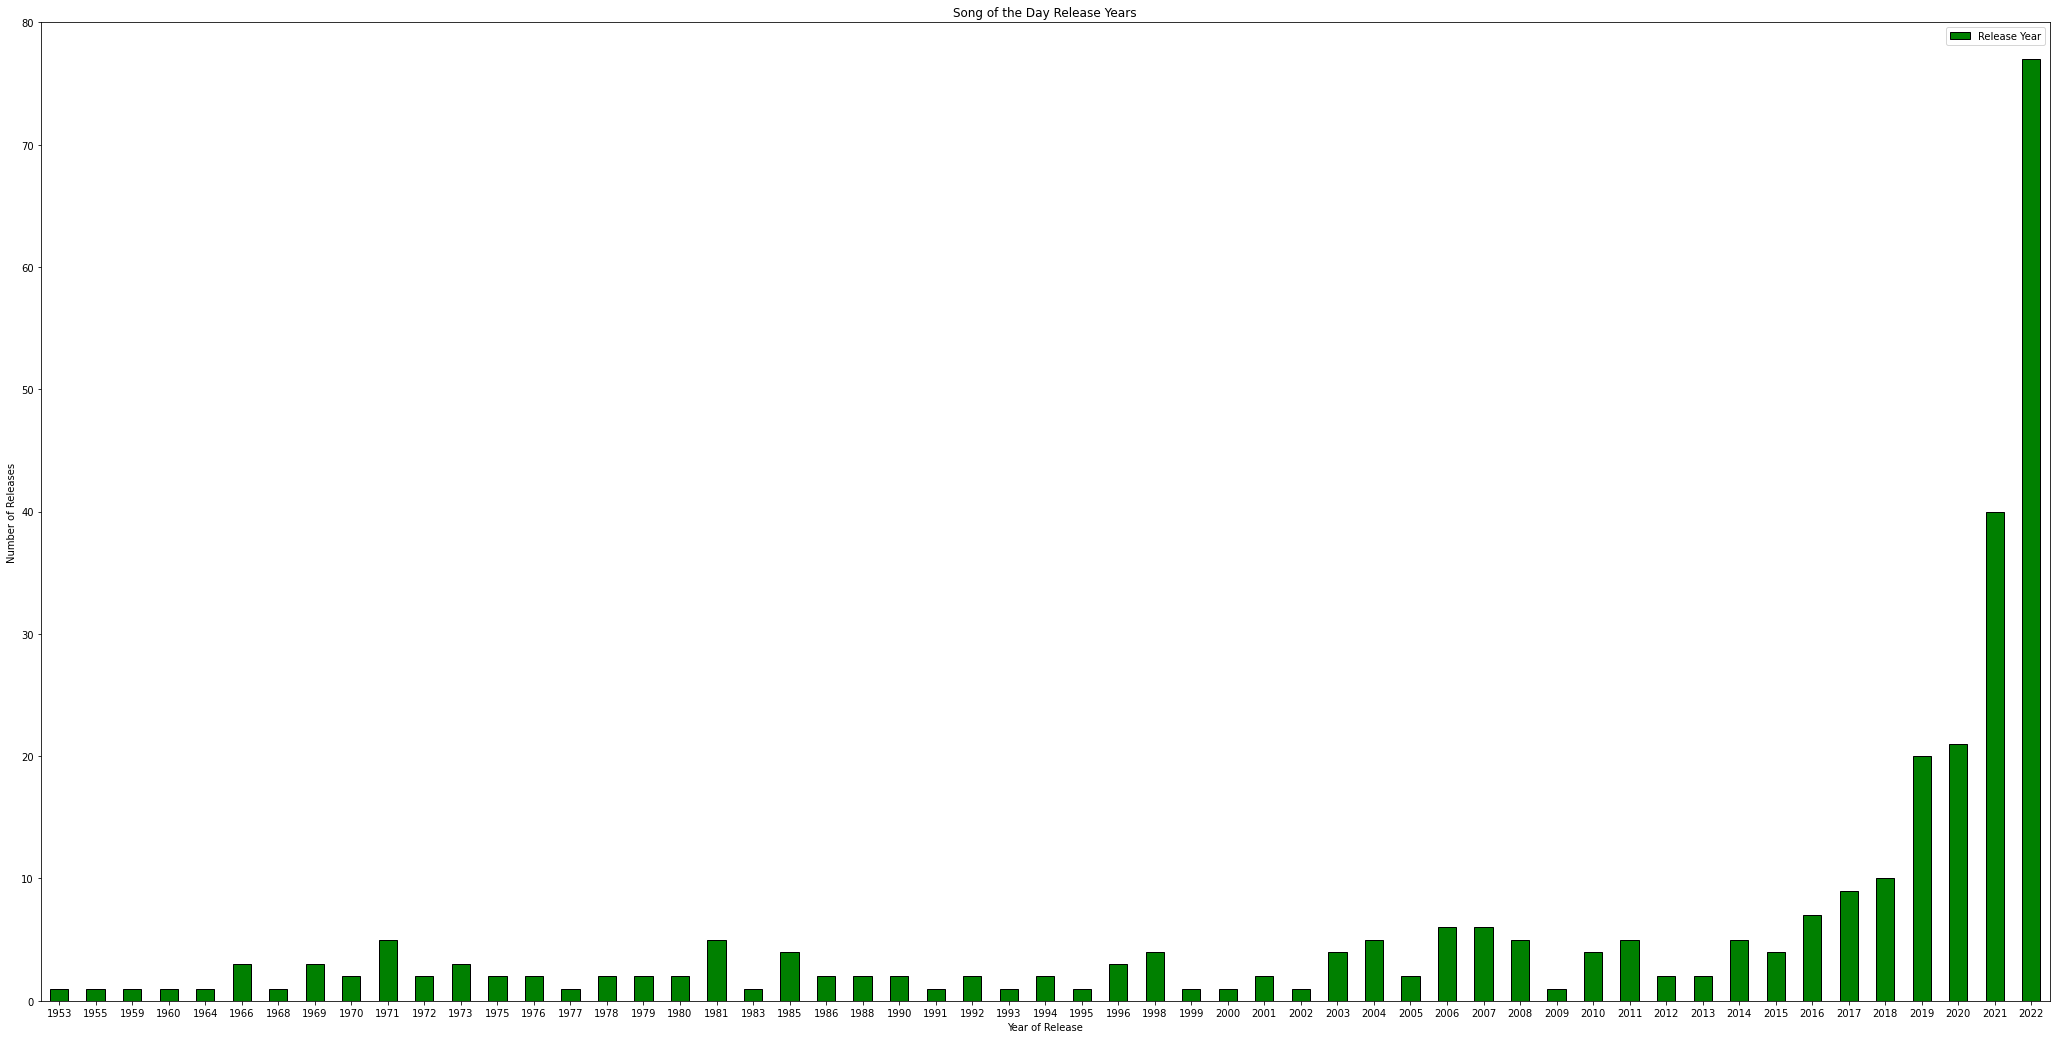

In [60]:
df.plot.bar(title = 'Song of the Day Release Years',
            width = .5,
            xlabel = 'Year of Release',
            ylabel = 'Number of Releases',
            ylim = (0, 80),
            figsize = (36, 18),
            rot = 0,
            color = ['green'],
            edgecolor = ['black'],
)

---
* Additional features wanted:
    * Accurate number representation (either through legend or bar itself)
    * change font size of x, y, and title
    * adjust borders
    * think about long term "scalability" how big will the table get?
---